# Tarea dia 2. Procesado de Lenguaje Natural


Antes de nada creamos una linia donde se enuentra el ```path``` de nuestro archivo para poder utilizar los caminos relativos para importar los datos.

**Importante**: El usuario debe comprobar que el ```data_path``` es el adecuado. En caso de que no lo sea debe modificar la celda siguiente para que sea correcto.

In [1]:
import os

ipynb_path = os.path.dirname(os.path.realpath("__file__"))
data_path = ipynb_path + "/Data/sentiment_dataset.csv"
print(data_path)

/media/eloi/ELOI/UNED/Cursos de Extension/Python Avanzado/Tareas/Dia_2/Data/sentiment_dataset.csv


## 1. Tratamiento y limpieza de datos
Importamos el conjunto de tweets

In [2]:
import pandas as pd

# Importamos los datos
data = pd.read_csv(data_path, encoding='ISO-8859-1', names=['sentimiento','id','date','flag','user','tweet'])

# Nos quedamos solo con las columnas de sentimiento y texto del tweet
data = data[['sentimiento', 'tweet']]


De todo este set de datos nos quedamos con 50000 de cada sentimiento. Utilizamos un sampling aleatorio de los diferentes subsets (sentimientos positivo y negativo).

In [3]:
from random import sample
data = pd.concat([
    data[data.sentimiento == 0].sample(n=50000, random_state=17), 
    data[data.sentimiento == 4].sample(n=50000, random_state=17)])

# Comprobamos que efectivamente el sampleo ha sido adecuado
data.groupby('sentimiento').count()

,tweet
sentimiento,
0,50000
4,50000


In [4]:
# Creamos dos listas con nuestros datos
tweet, sentimiento = list(data.tweet), list(data.sentimiento)

Creamos una función donde entra un tweet i sale un tweet limpio. Esto incluye:
- Eliminar:
    - Links
    - Usertags
    - Emojis
    - Repeticiones de letras
- Tokenización
- Lematización

In [5]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

def lem_stem(palabra):
    return SnowballStemmer('english').stem(
                      PorterStemmer().stem(
             WordNetLemmatizer().lemmatize(palabra)))

def clean(twt, emojis, stopwords):
    # Eliminamos links
    twt = re.sub(r'((http://)[^ ]*|(https://[^ ]*|(www\.)[^ ]*))', '', twt)
    
    # Eliminamos emojis
    for emoji in emojis:
        twt = twt.replace(emoji, '')
    
    # Eliminamos usertags
    twt = re.sub(r'@[^\s]+', '', twt)
    
    # Eliminamos caracteres que no son letras o numeros
    twt = re.sub(r'[^a-zA-Z0-9]', ' ', twt)
    
    # Eliminamos caracteres repetidos para que haya un maximo de 2
    twt = re.sub(r'(.)\1\1', r'\1\1', twt)
    
    # Tokenizamos el twt (como separarlo por palabras)
    twt = word_tokenize(twt)
    
    # Eliminamos las palabras de la lista de stopwords y terminamos la funcion
    return [lem_stem(word) for word in twt if not word in stopwords]

Ahora simplemente obtenemos las listas de emojis y de *stopwords* y iteramos sobre los tweets llamando a la funcion.

In [6]:
import nltk

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused','<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat',';D':'winkhappy'}
emokeys = emojis.keys()

stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'go', 'got','going','had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if','im', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'na','now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', 'shoulda', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 'URL', 've', 'very', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves'])

for i in range(len(tweet)):
    tweet[i] = clean(tweet[i], emokeys, stopwords)

Guardamos los tweets limpios en una nueva columna de nuestro dataframe y comprovamos que efectivamente han sido correctamente tratados.

In [7]:
data['tweet_tok'] = tweet

data.head()

,sentimiento,tweet,tweet_tok
403130,0,my throat is sore,"[throat, sore]"
222266,0,@htarresnom AGREGAME PLEASE NO SE COMO AGREGAR,"[agregam, plea, no, se, como, agregar]"
792525,0,i don't know what to do i must kill someone bu...,"[know, must, kill, someon, know, help, plz]"
539808,0,"uhg, have 2 finish this stupid religion projec...","[uhg, 2, finish, stupid, religion, project, 4,..."
483386,0,After a night of cat pee-cleaning and Law and ...,"[after, night, cat, pee, clean, law, order, sv..."


### 1.1. Wordcloud
Antes de empezar con los modelados realizamos los wordcloud de los tweets positivos y negativos. Primero positivos:

In [8]:
from wordcloud import WordCloud

good_Freq = nltk.FreqDist(data.tweet_tok[data.sentimiento == 4].sum())
wordcloud_good = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(good_Freq.most_common(20)))

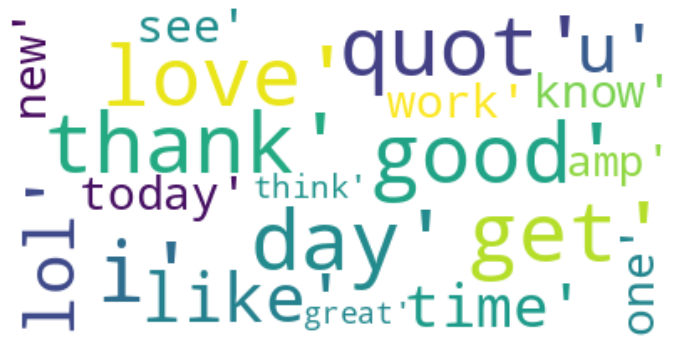

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off")
plt.show()

Ahora negativos:

In [10]:
bad_Freq = nltk.FreqDist(data.tweet_tok[data.sentimiento == 0].sum())
wordcloud_bad = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(bad_Freq.most_common(20)))

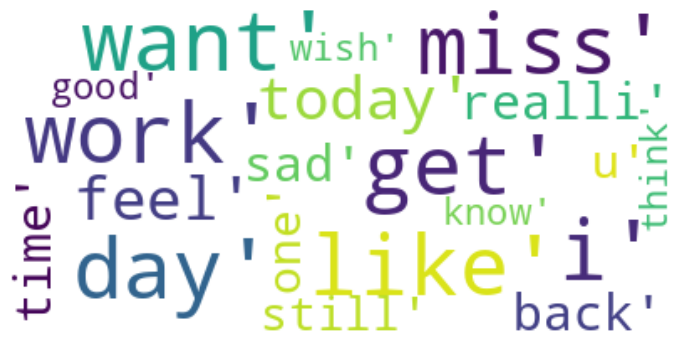

In [11]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2. Entrenamiento y tests de modelos

Un ultimo tratamiento de los datos utiliza el TF-IDF Vecotiser. Este mide la importancia de las palabras del texto y ayuda al modelo a evaluar.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separamos el data set en el training i el testing
X_train, X_test, y_train, y_test = train_test_split(data.tweet, data.sentimiento, shuffle=True, test_size=0.05)

# Construimos y utilizamos el vectoriser
vec = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)
vec.fit(X_train)

# Transformamos nuestros datos con este vector
X_train = vec.transform(X_train)
X_test = vec.transform(X_test)

Empezamos los modelados. Utilizaremos el modelo de Bernoulli y el modelo de *logistic regression*. Definimos una funcion que imprima los resultados de los tests.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

def model_eval(modelo, X_train, X_test, y_train, y_test):
    
    print("Entrnamiento del modelo iniciado", end='\r')
    # Entrenamos el modelo
    modelo.fit(X_train, y_train)
    print("Entrnamiento del modelo finalizado")
    
    # Encontramos la predicción
    y_pred = modelo.predict(X_test)
    
    print(classification_report(y_test, y_pred))

    matriz_confusion = confusion_matrix(y_test, y_pred)
    

    plt.figure(figsize=(8,8))
    sns.set(font_scale=2)
    sns.heatmap(matriz_confusion, 
                annot=np.asarray([f'{s:.2%}' for s in matriz_confusion.flatten() / np.sum(matriz_confusion)]).reshape(2,2),
                cmap='Greens',
                fmt='',
                xticklabels=['Negativa','Positiva'],
                yticklabels=['Negativa','Positiva']
    )
    plt.xlabel("Valores Estimados", labelpad = 10)
    plt.ylabel("Valores Reales"   , labelpad = 10)
    plt.title ("Matriz de confusión", pad = 10)
    

Procedemos a evaluar el modelo de Naive-Bayes.

Entrnamiento del modelo finalizado
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2489
           4       0.79      0.75      0.77      2511

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000



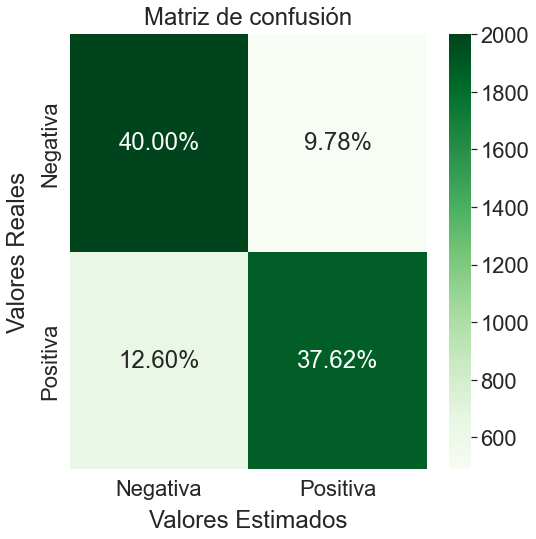

In [32]:
from sklearn.naive_bayes import BernoulliNB

model_BNB = BernoulliNB()
model_eval(model_BNB, X_train, X_test, y_train, y_test)

Ahora probamos con el modelo logístico.

Entrnamiento del modelo finalizado
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2489
           4       0.80      0.78      0.79      2511

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



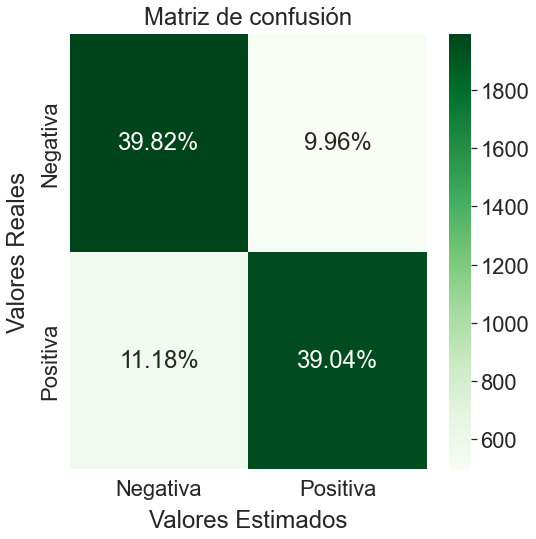

In [34]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=500)
model_eval(model_log, X_train, X_test, y_train, y_test)

Ambos modelos dan resultados bastante buenos, aunque la regresión logística es ligeramente mejor.

Solo por curiosidad, voy a escribir dos tweets a mano, a ver cuales son los resultados.

In [47]:
extra_twt = ['I am sick of this. I want free education!',
             'This country has been an amazing example of adequate healthcare service during the pandemic']

extra_twt = vec.transform(extra_twt)

extra_pred_BNB = model_BNB.predict(extra_twt)
extra_pred_log = model_log.predict(extra_twt)

print(extra_pred_BNB)
print(extra_pred_log)

# En mi test los resultados han sido correctos!

[0 4]
[0 4]


Por curiosidad extra. Voy a repetirlo con 5 tweets que tengo en mi feed de twitter.

In [48]:
extra_twt = ['US capitalism delivers a rigidly unequal distribution of wealth unless and until the bottom 90% -  the vast majority - change the system.', # https://twitter.com/profwolff/status/1495088290709577728
             'I think the reason I like the Dunmer the most is because they have probably the most in-depth lore and worldbuilding (thanks Michael Kirkbride)', # https://twitter.com/azureScapegoat/status/1495083045724078080
             'And finally: Altmer are Nazis, Bosmer are made of goop and aren\'t even real elves, orsimer would be cooler if they weren\'t constantly portrayed as unintelligent brutes but for now they\'re pretty boring', # https://twitter.com/azureScapegoat/status/1495087263910436864
             'Oh wow!!! International Magazine is already previewing my article on the bombing of Hanoi and the American War!!', # https://twitter.com/LunaOi_VN/status/1493714358123126789
             'This is the kind of bizarre creepy reporter that garbage CIA front Reuters hires.'] # https://twitter.com/LunaOi_VN/status/1495014853810876416

extra_twt = vec.transform(extra_twt)

extra_pred_BNB = model_BNB.predict(extra_twt)
extra_pred_log = model_log.predict(extra_twt)

# Yo diria [0 4 0 4 0]
# El mas complicado para el modelo debe ser el primero por que es la descripcion de un hecho malo, pero sin ser subjetivo

print(extra_pred_BNB)
print(extra_pred_log)

# El resultado es sorprendentemente malo!

[0 0 0 4 4]
[0 4 0 4 4]
